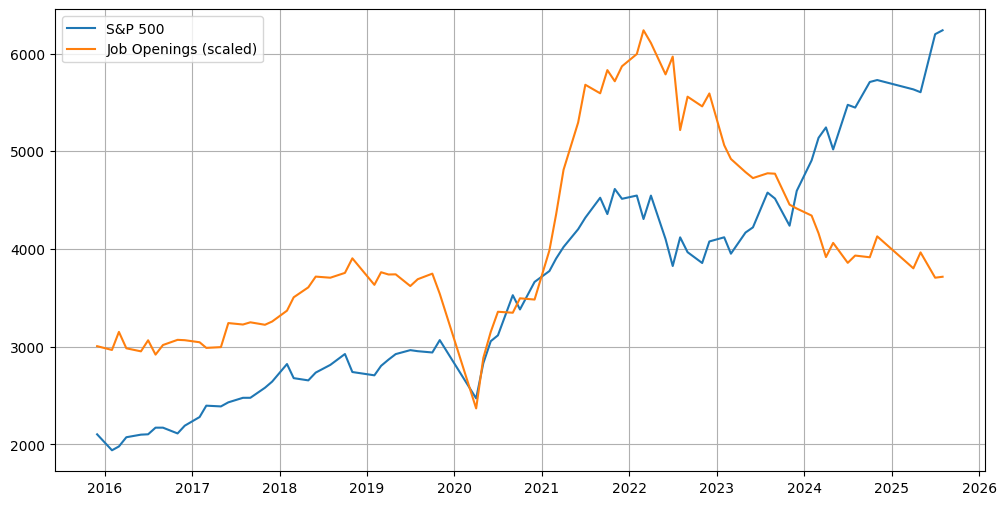

In [5]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt


from dotenv import load_dotenv
import os
from fredapi import Fred

load_dotenv()  # loads .env

api_key = os.getenv("FRED_API_KEY")
fred = Fred(api_key=api_key)

# download
sp500 = fred.get_series("SP500")
jolts = fred.get_series("JTSJOL")

# align
df = pd.concat([sp500, jolts], axis=1)
df.columns = ["SP500", "Job_Openings"]
df = df.dropna()

# rescale job openings for visual comparison
df["Job_Openings_Rescaled"] = df["Job_Openings"] * (
    df["SP500"].max() / df["Job_Openings"].max()
)

# plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["SP500"], label="S&P 500")
plt.plot(df.index, df["Job_Openings_Rescaled"], label="Job Openings (scaled)")
plt.legend()
plt.grid(True)
plt.show()



#f43f867d6b7d52f9f41cb36c7ff5e637